**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the next sprint!

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
#checking missing values
df_reviews.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [7]:
#removing missing values 
df_reviews.dropna(axis=0)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164


In [8]:
#checking for duplicates 
df_reviews.duplicated().sum()

0

In [9]:
#checking for dtypes 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

## EDA

Let's check the number of movies and reviews over years.

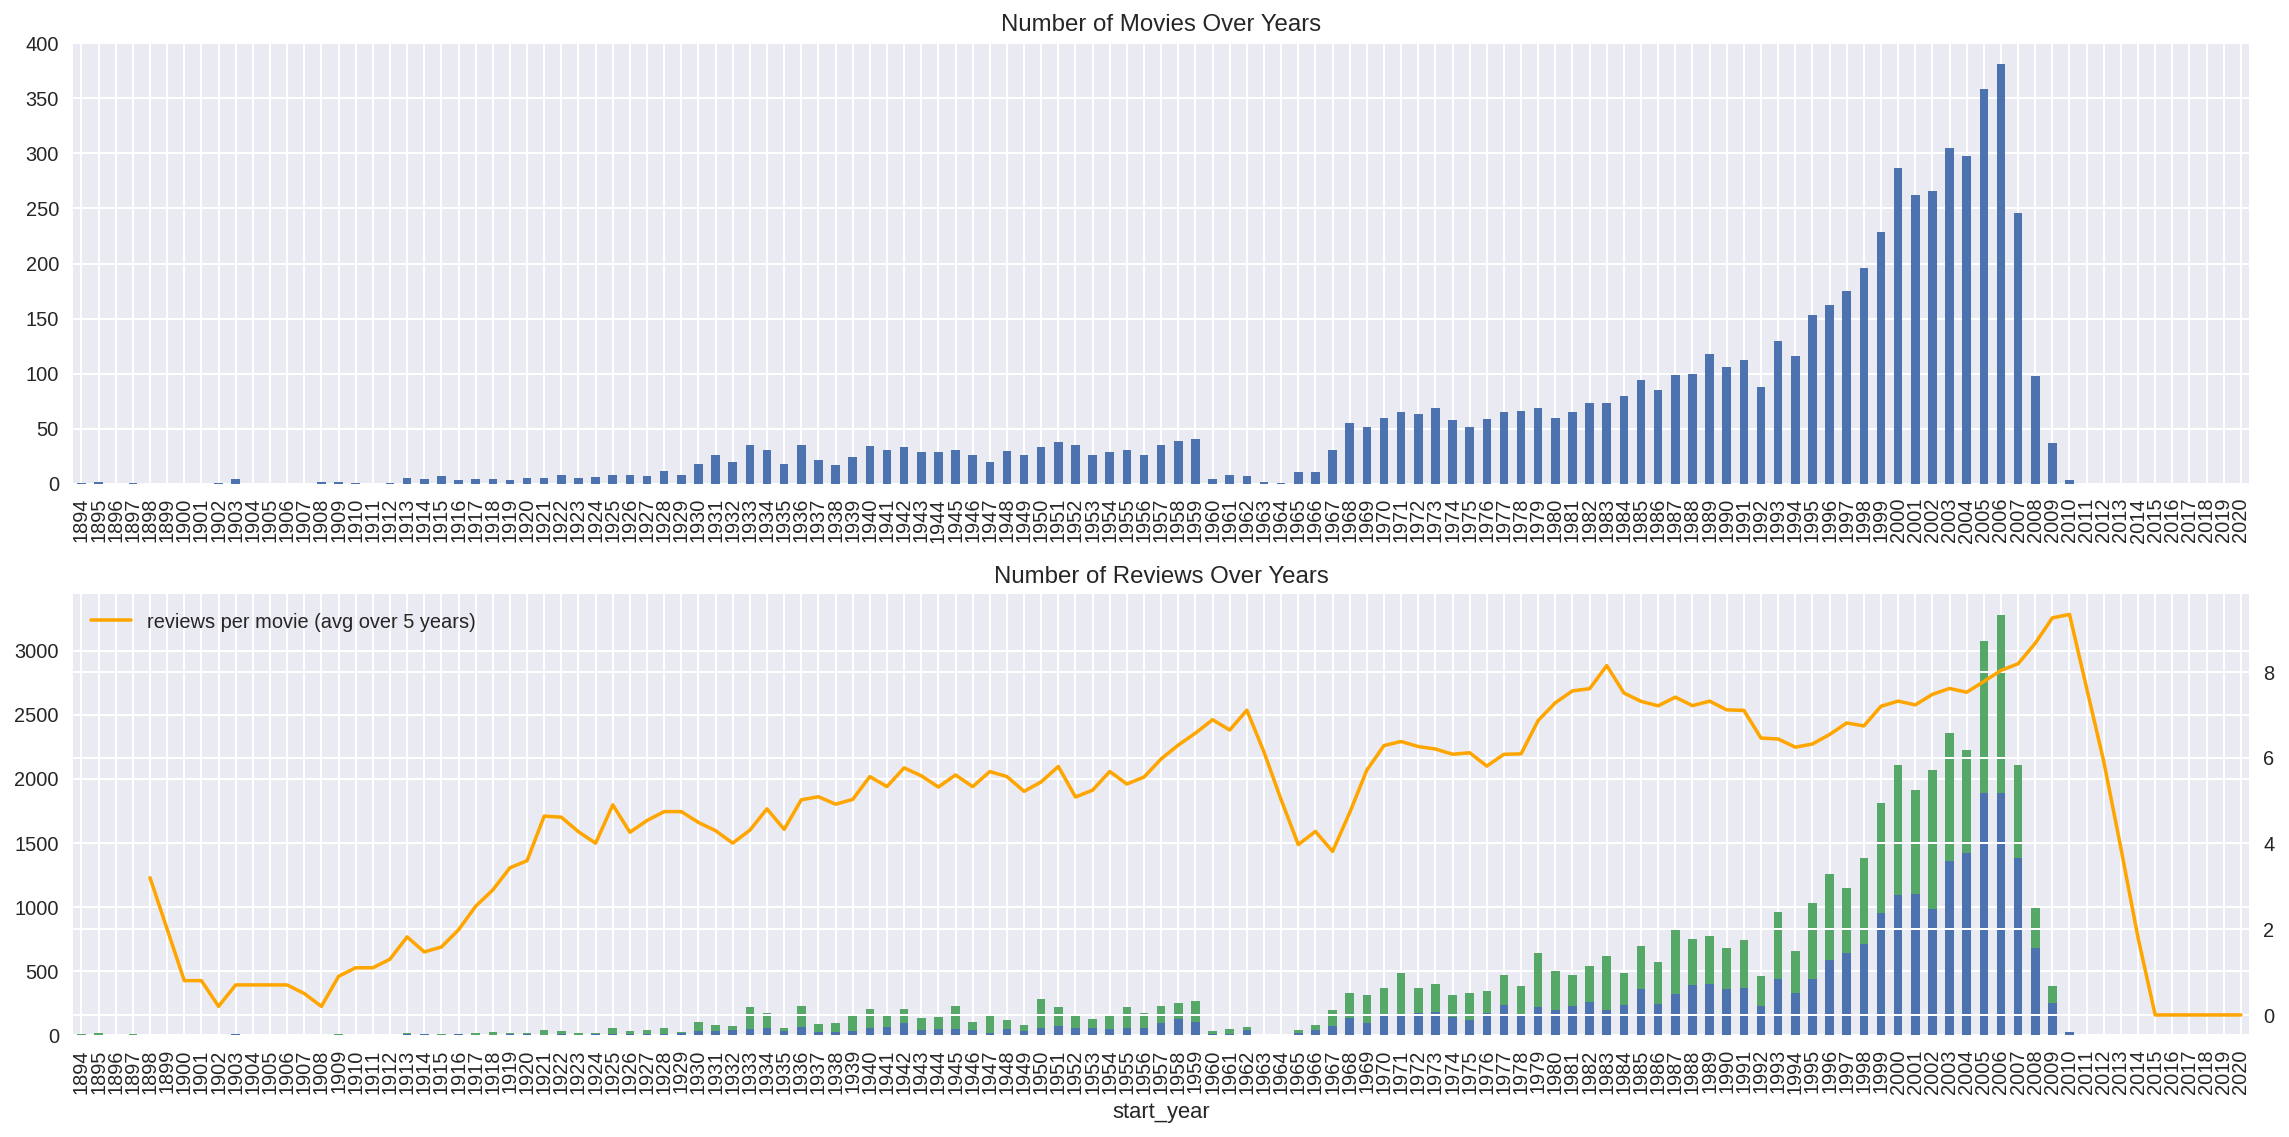

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

The first plot visualizes the number of movies over the years and the second plot visualizes the number of reviews over the years and the rolling average review within a 5 years period. As the number of movies increases each year, so does the reviews. Number of movies released over the years and number of reviews over the years have the same trend: a slow incline and then a steep decline. 2006 had the most movies released and declined from 2007 and onward. 

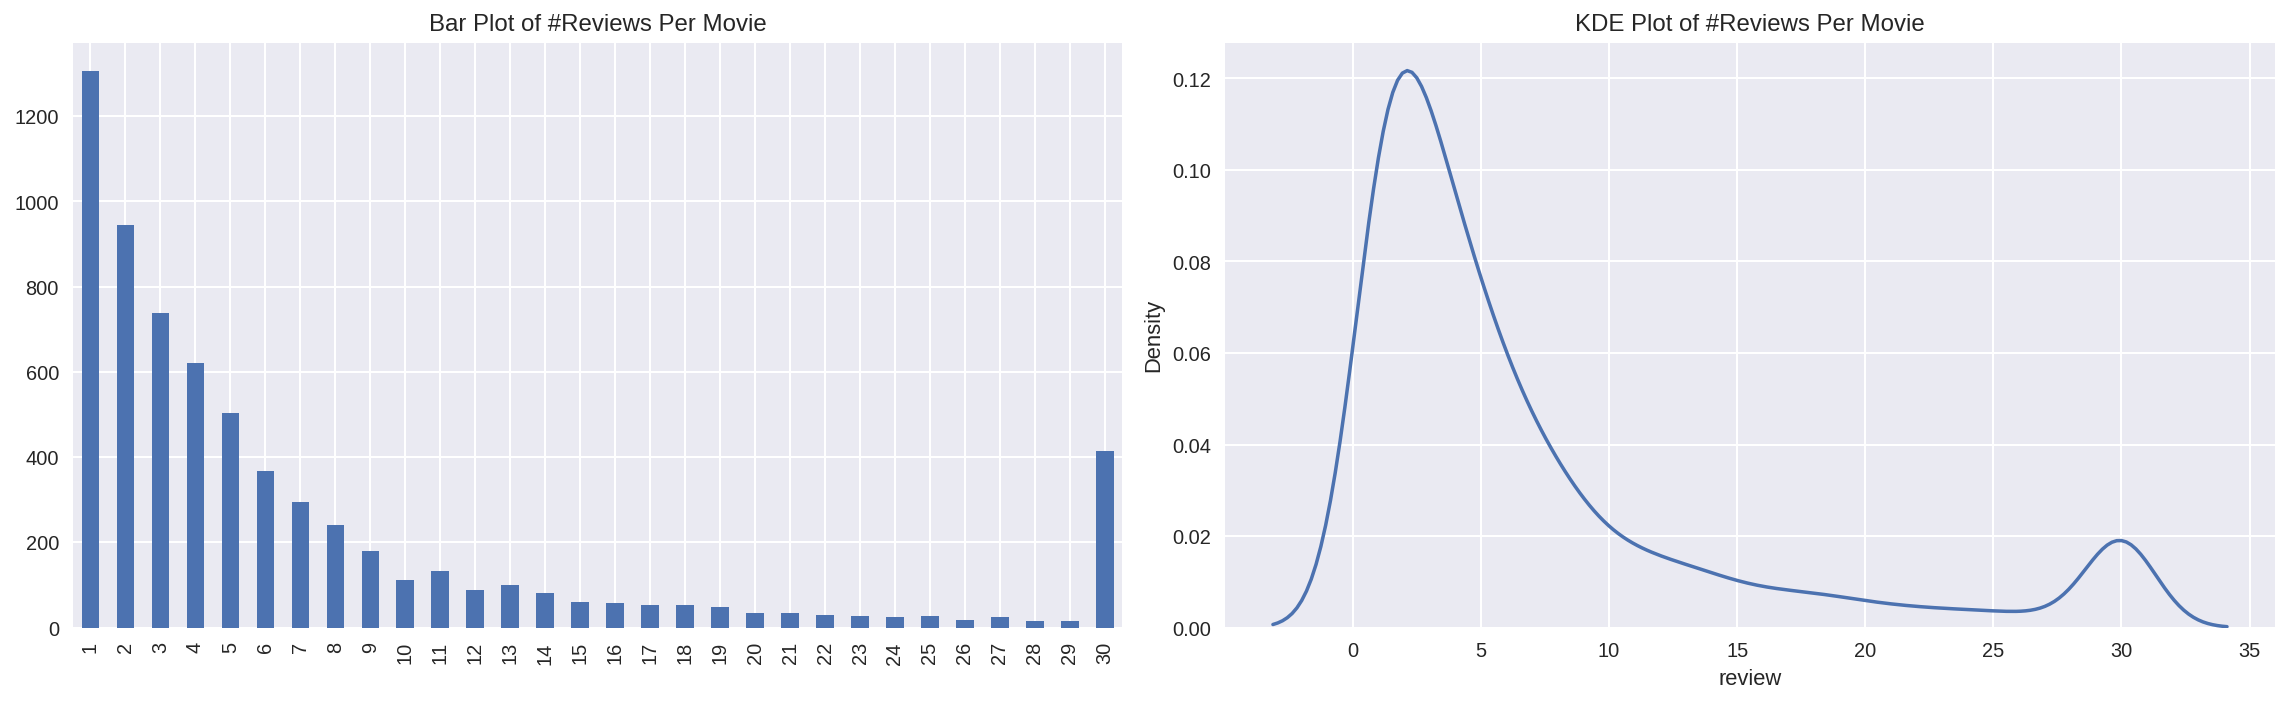

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Majority of the movies have low reviews. Most of them have 1 number of reviews. As the number of reviews increase the number of frequency deceases. Except for movies with 30 reviews.

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

Negative and positive reviews are balanced. There is no need to perform upsampling or downsampling 

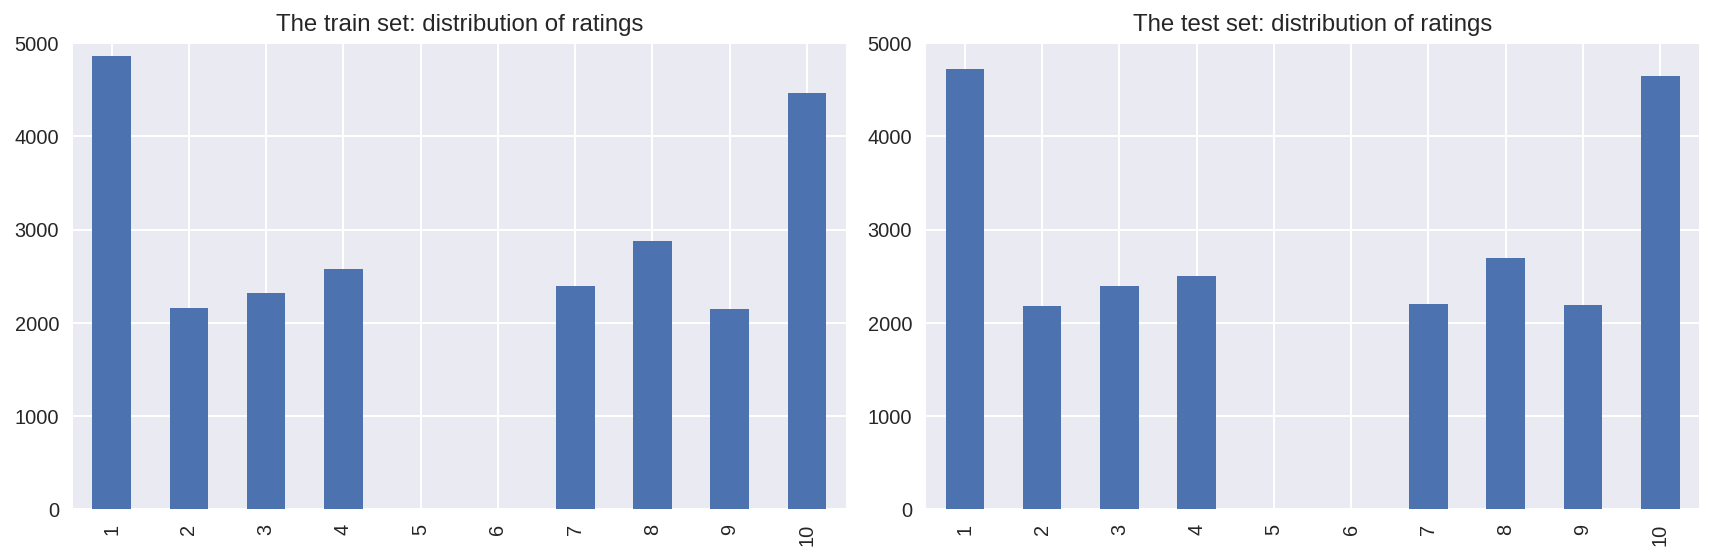

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

In [12]:
print('Training set: distribution of rating:')
print(df_reviews.query('ds_part == "train"')['pos'].value_counts().sort_index())
print('Test set: distribution of rating:')
print(df_reviews.query('ds_part == "test"')['pos'].value_counts().sort_index())

Training set: distribution of rating:
0    11912
1    11884
Name: pos, dtype: int64
Test set: distribution of rating:
0    11803
1    11732
Name: pos, dtype: int64


Distribution of negative and positive reviews over the years for two parts of the dataset

Negative and positive reviews of testing and training sets are fairly balanced. Reviews are either negative from 1-4 or positive 7-10, there are no neutral reviews from 5-6.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


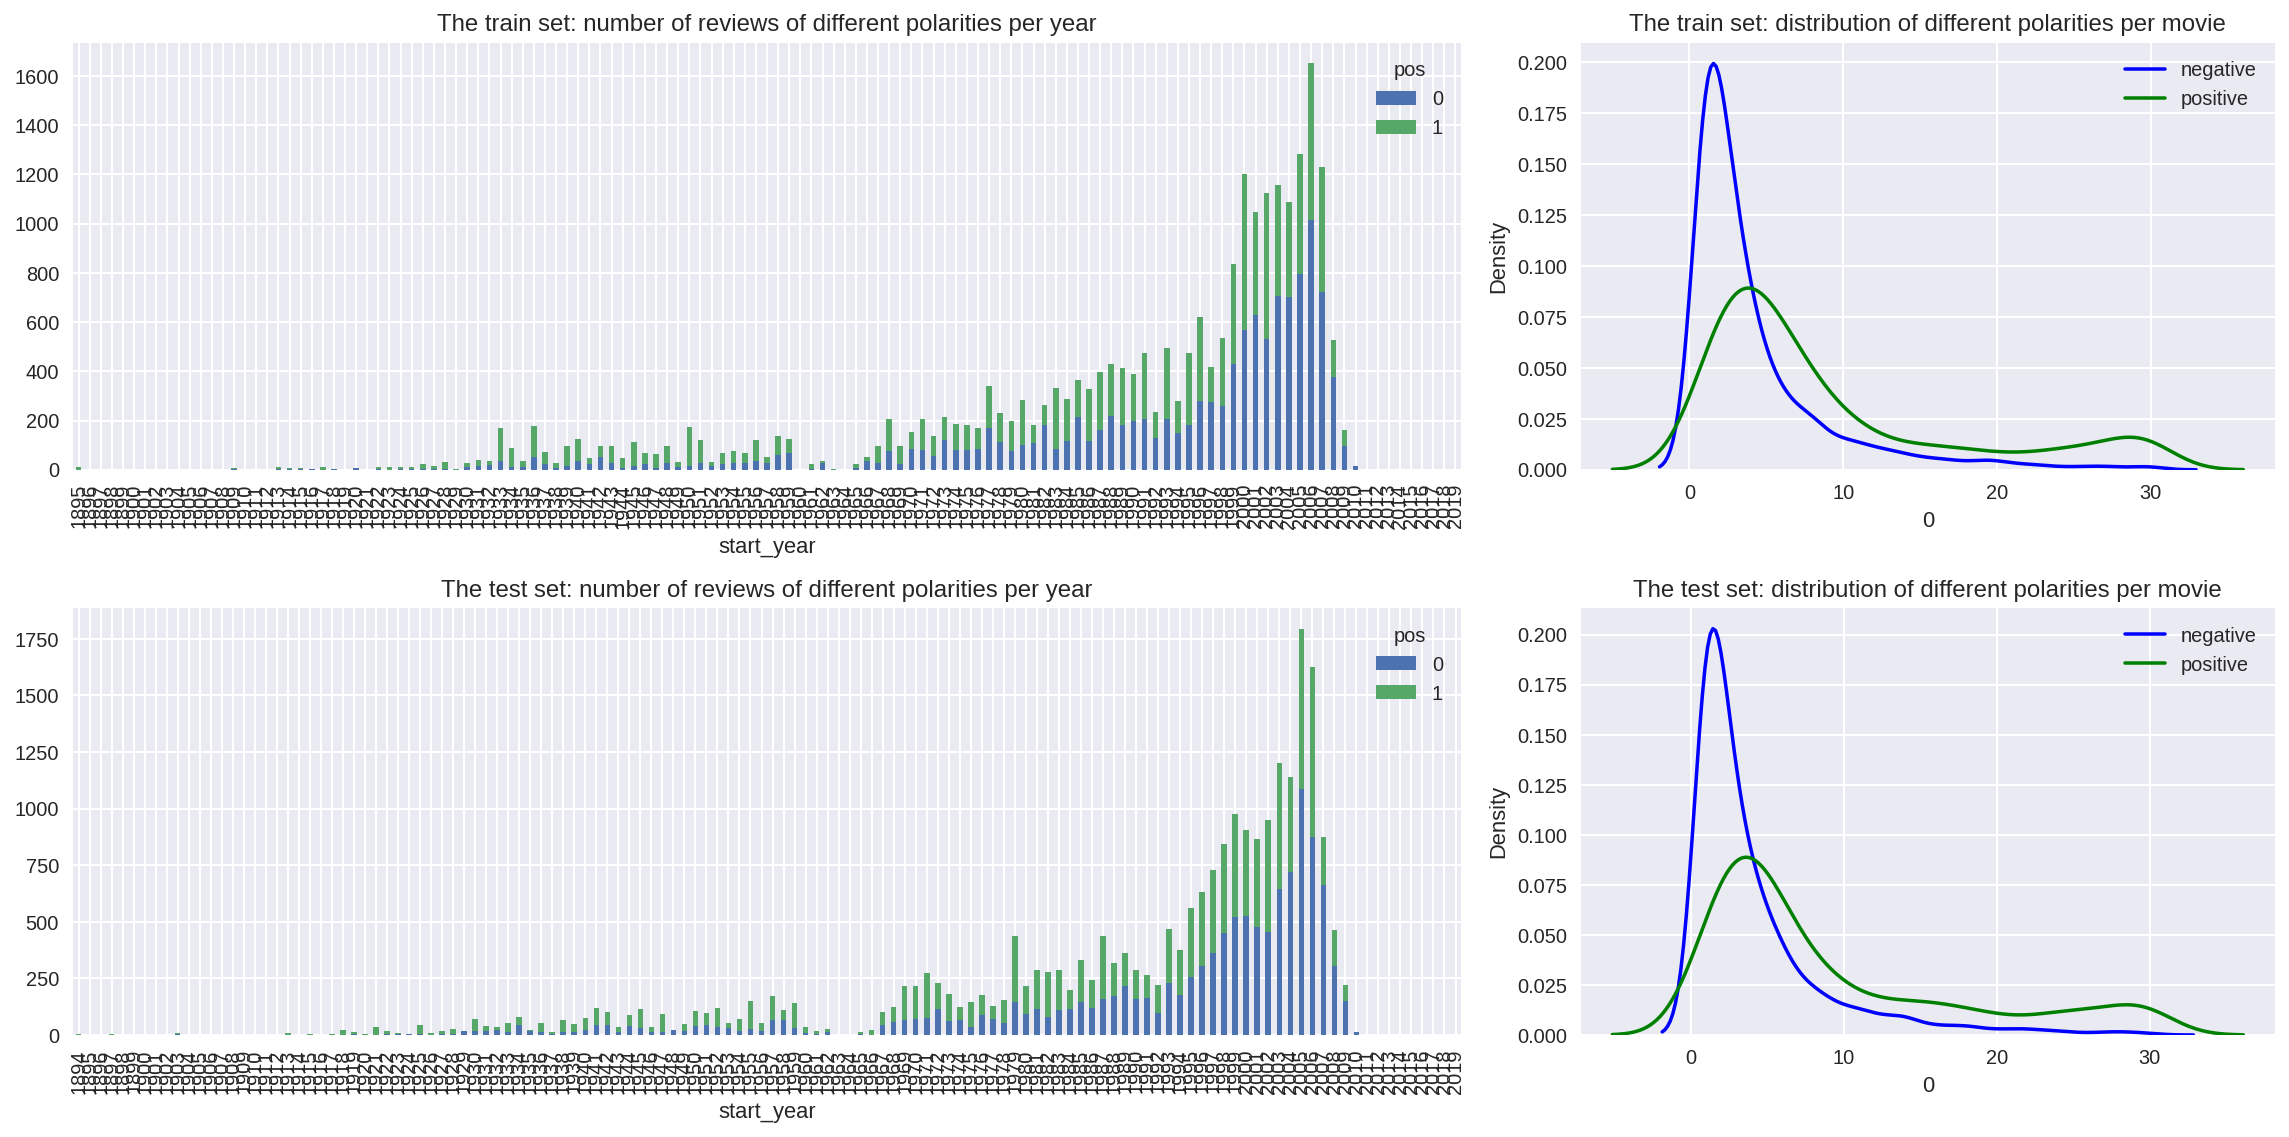

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

Both training and testing sets have similiar trends and number of reviews. This reconfirms that number of positive and negative reviews are evenly distributed visually especially in the later years. The kde plots tell us that from 0-10 reviews have more negative reviews than positive and as the number of reviews decrease the positive reviews are slightly greater. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you explored the data and made some interesting observations!

</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [13]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [14]:
import re

df_reviews = pd.DataFrame(df_reviews)
df_reviews['review_norm'] = df_reviews['review'].apply(lambda x: re.sub(r"[^a-zA-Z' ]", "", x).lower())
df_reviews

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,review_norm
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335,the pakage implies that warren beatty and gold...
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336,how the hell did they get this made presenting...
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489,there is no real story the film seems more lik...
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280,um a serious film about troubled teens in sin...
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281,i'm totally agree with garryjohal from singapo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47326,tt0068398,tvEpisode,Étude in Black,Étude in Black,1972,\N,97,0,"Crime,Drama,Mystery",7.7,2254,This is another of my favorite Columbos. It sp...,10,pos,1,test,6038,this is another of my favorite columbos it spo...
47327,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Talk about being boring! I got this expecting ...,4,neg,0,test,989,talk about being boring i got this expecting a...
47328,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,"I never thought I'd say this about a biopic, b...",8,pos,1,test,4163,i never thought i'd say this about a biopic bu...
47329,tt0223503,tvMovie,Îhatôbu gensô: KENjI no haru,Îhatôbu gensô: KENjI no haru,1996,\N,55,0,"Animation,Biography,Drama",7.3,278,Spirit and Chaos is an artistic biopic of Miya...,9,pos,1,test,4164,spirit and chaos is an artistic biopic of miya...


<div class="alert alert-success">
<b>Reviewer's comment</b>

Normalization was applied successfully

</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [15]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

In [16]:
X_train = df_reviews_train.review_norm
y_train = y_train = df_reviews_train['pos']

X_test = df_reviews_test.review_norm
y_test = df_reviews_test['pos']

In [17]:
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(23796,)
(23796,)
(23535,)
(23535,)


In [18]:
print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [22]:
from sklearn.dummy import DummyClassifier

In [23]:
dummy = DummyClassifier(strategy='stratified', random_state=1234)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1234, strategy='stratified')

          train  test
Accuracy    0.5   0.5
F1          0.5   0.5
APS         0.5   0.5
ROC AUC     0.5   0.5


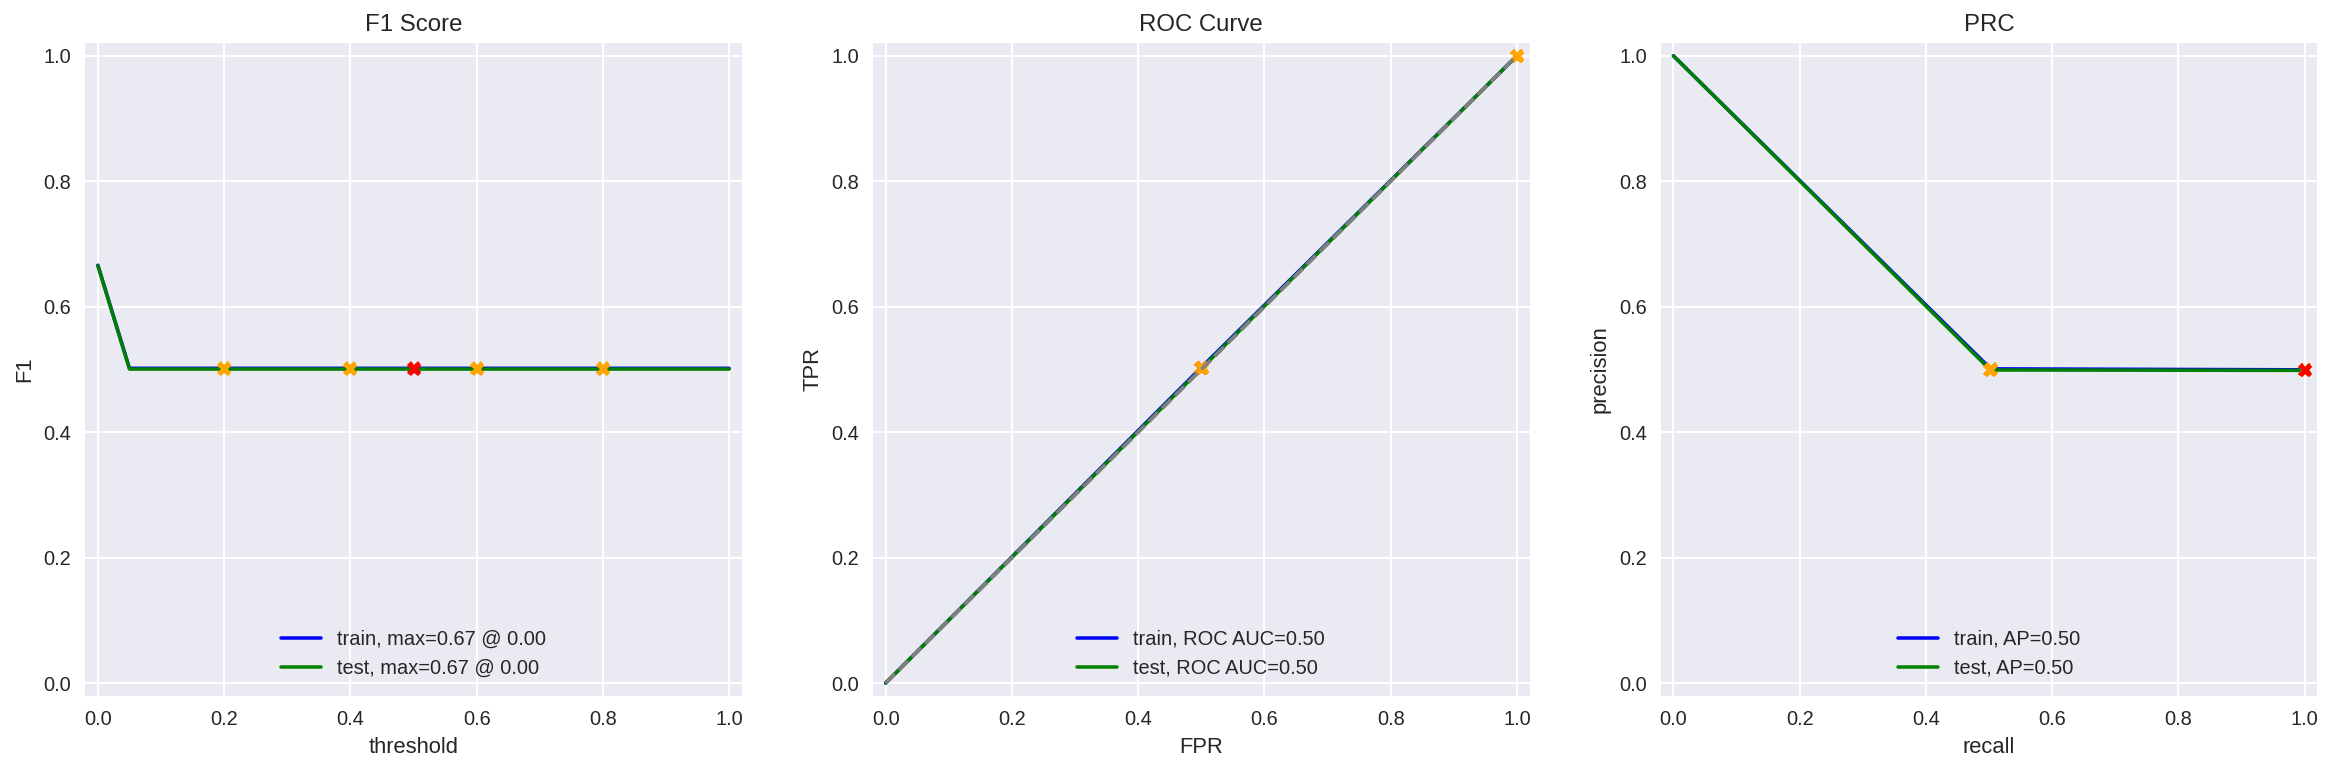

In [24]:
evaluate_model(dummy, X_train, y_train, X_test, y_test)

With the dummy model, the accuracy, F1 and APS and ROC AUC scores are all 0.50 for both train and test sets. We will test other models to see if the scores will improve. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, now we have a very simple baseline to beat

</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [35]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [36]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized = ' '.join(lemmas)
    return lemmatized

In [37]:
X_train_lemmatized = X_train.apply(lemmatize_text)
X_test_lemmatized = X_test.apply(lemmatize_text)

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's nice that you applied lemmatization

</div>

In [68]:
count_tf_idf_1 = TfidfVectorizer(stop_words=stopwords.words('english'))

train_tf_idf = count_tf_idf_1.fit_transform(X_train_lemmatized)
test_tf_idf = count_tf_idf_1.transform(X_test_lemmatized)

<div class="alert alert-success">
<b>Reviewer's comment</b>

TF-IDF was successfully used to vectorize text data

</div>

In [39]:
model_1 = LogisticRegression(random_state=12345)
model_1.fit(train_tf_idf, y_train)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


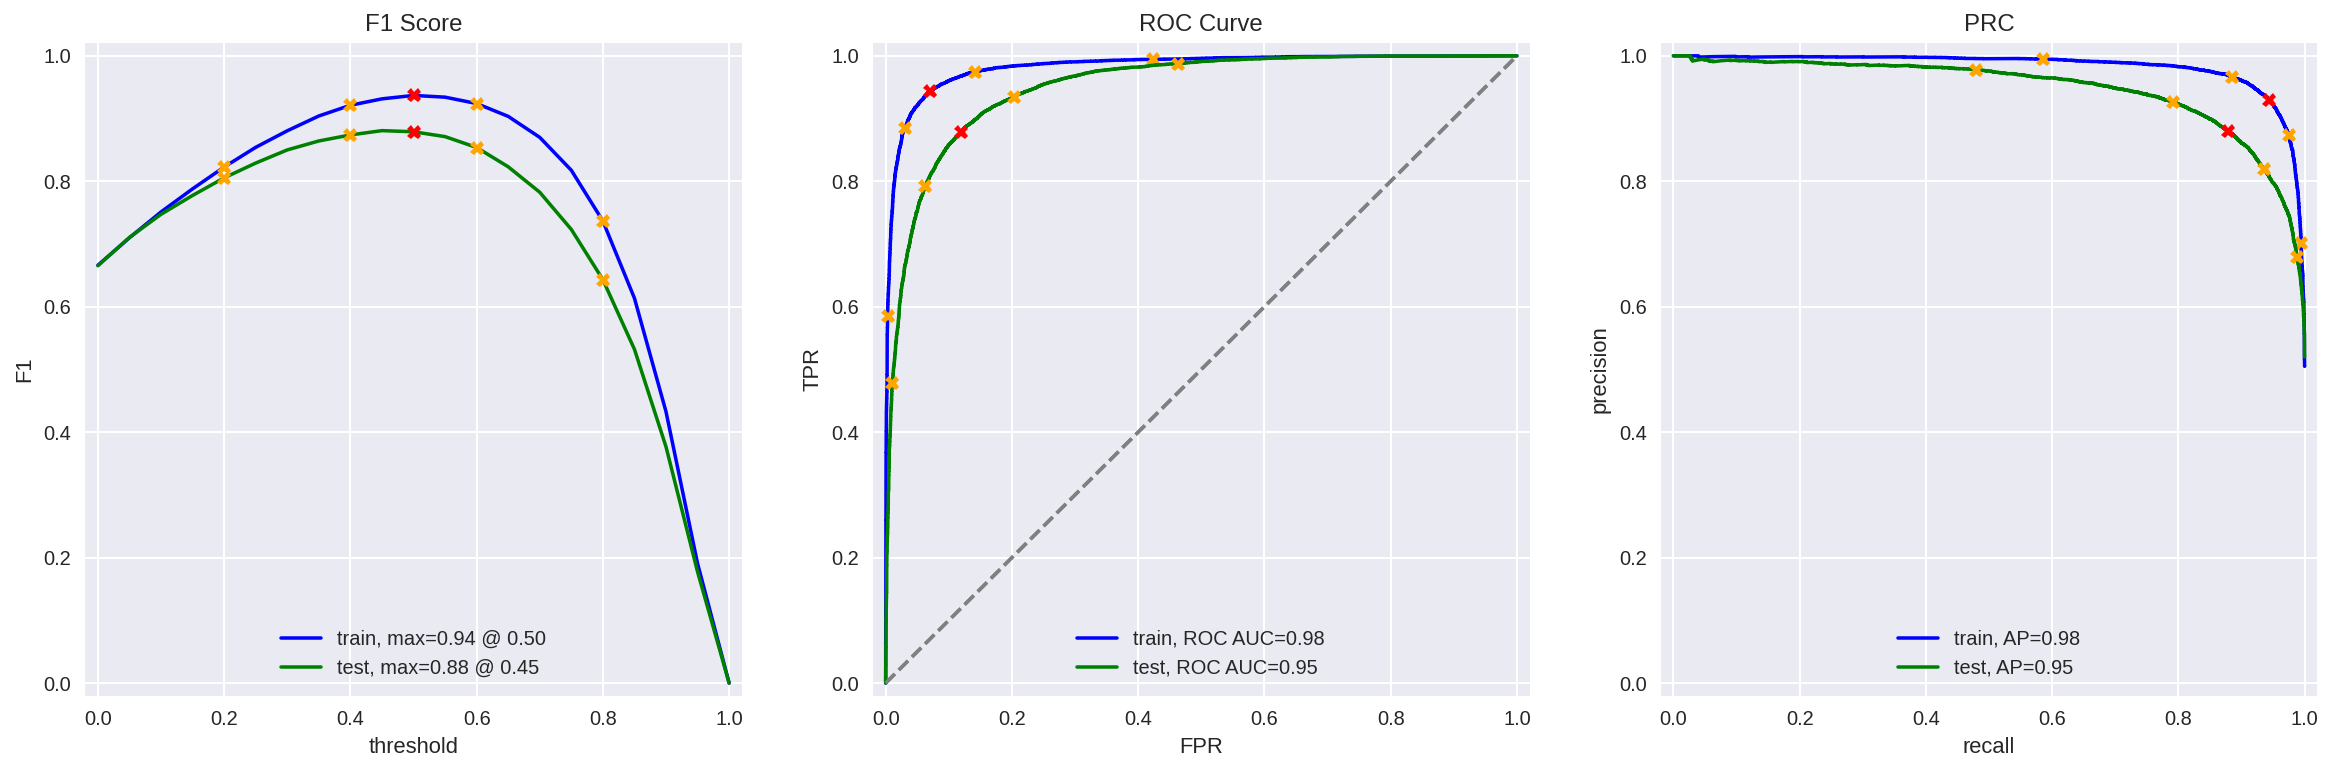

In [69]:
evaluate_model(model_1, train_tf_idf , y_train, test_tf_idf, y_test)

### Model 3 - spaCy, TF-IDF and LR

In [42]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [43]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [45]:
X_train_spacy = X_train.apply(text_preprocessing_3)
X_test_spacy = X_test.apply(text_preprocessing_3)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you also tried lemmatization with Spacy

</div>

In [66]:
count_tf_idf_3 = TfidfVectorizer(stop_words=stopwords.words('english'))

train_tf_idf_model_3 = count_tf_idf_3.fit_transform(X_train_spacy)
test_tf_idf_model_3 = count_tf_idf_3.transform(X_test_spacy)

model_3 = LogisticRegression(random_state=12345)
model_3.fit(train_tf_idf_model_3, y_train)

LogisticRegression(random_state=12345)

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


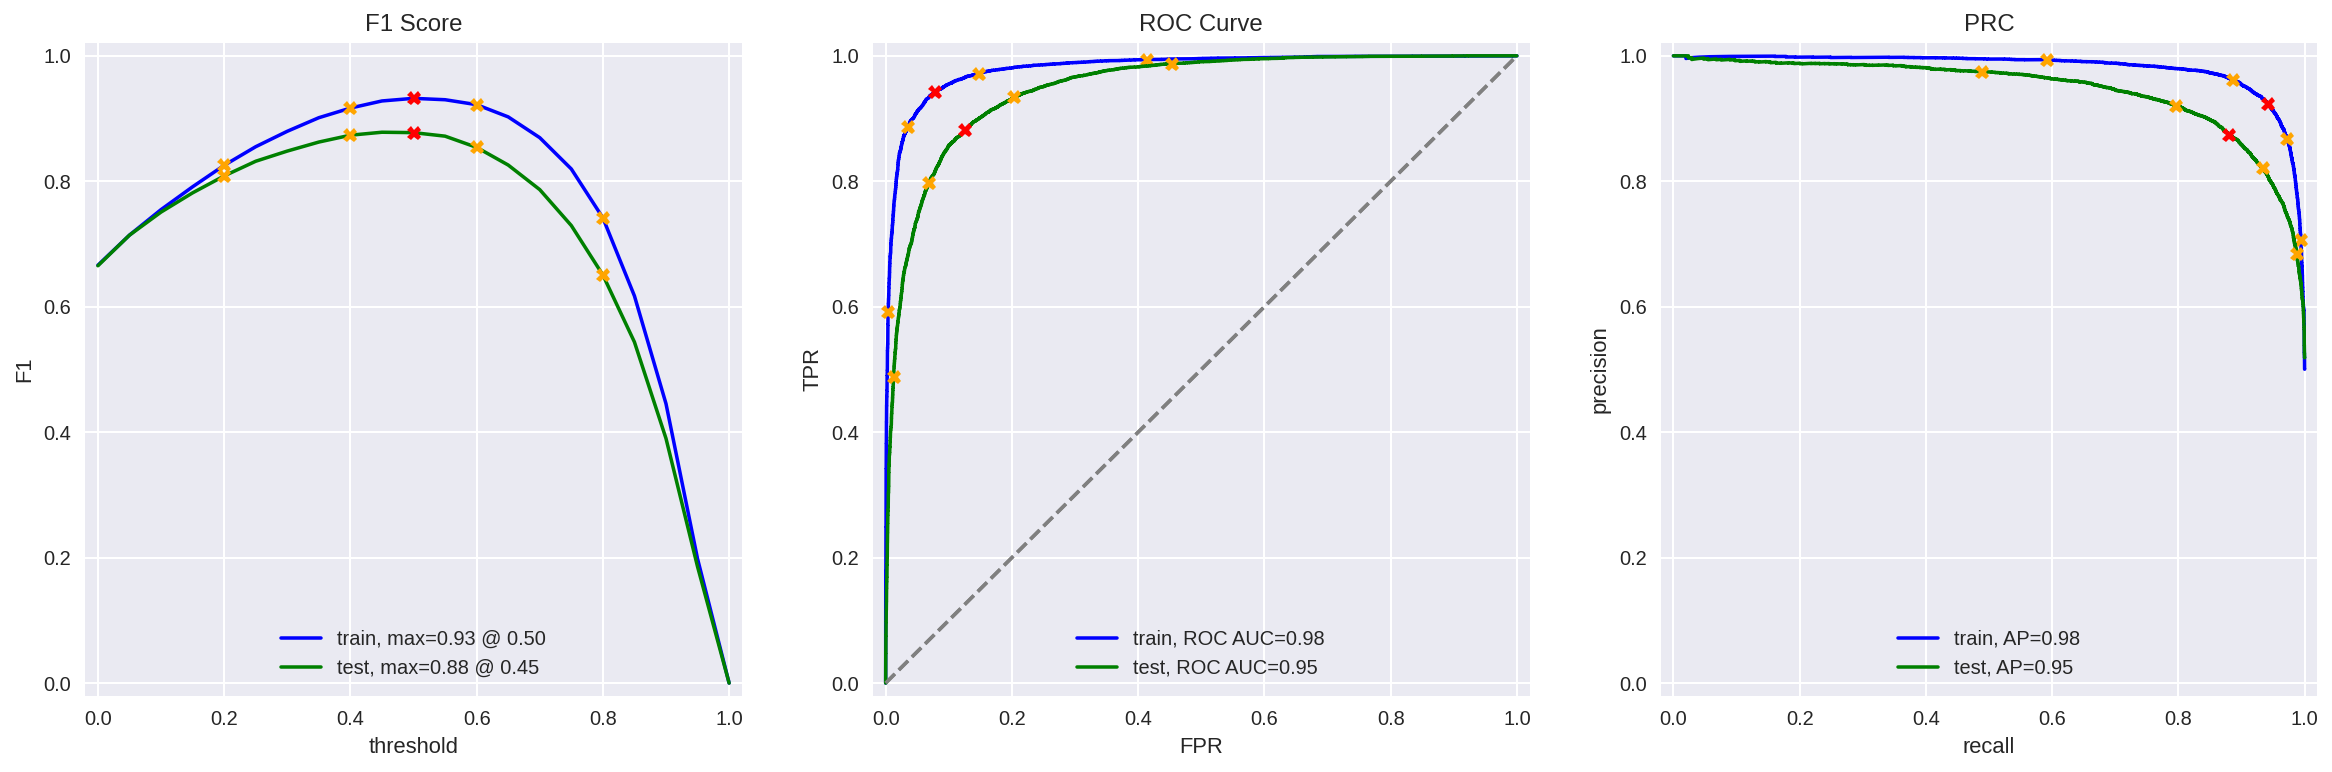

In [67]:
evaluate_model(model_3, train_tf_idf_model_3 , y_train, test_tf_idf_model_3, y_test)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [78]:
from lightgbm import LGBMClassifier

In [79]:
model_4 = LGBMClassifier(random_state=12345)

In [80]:
model_4.fit(train_tf_idf_model_3, y_train)

LGBMClassifier(random_state=12345)

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.93


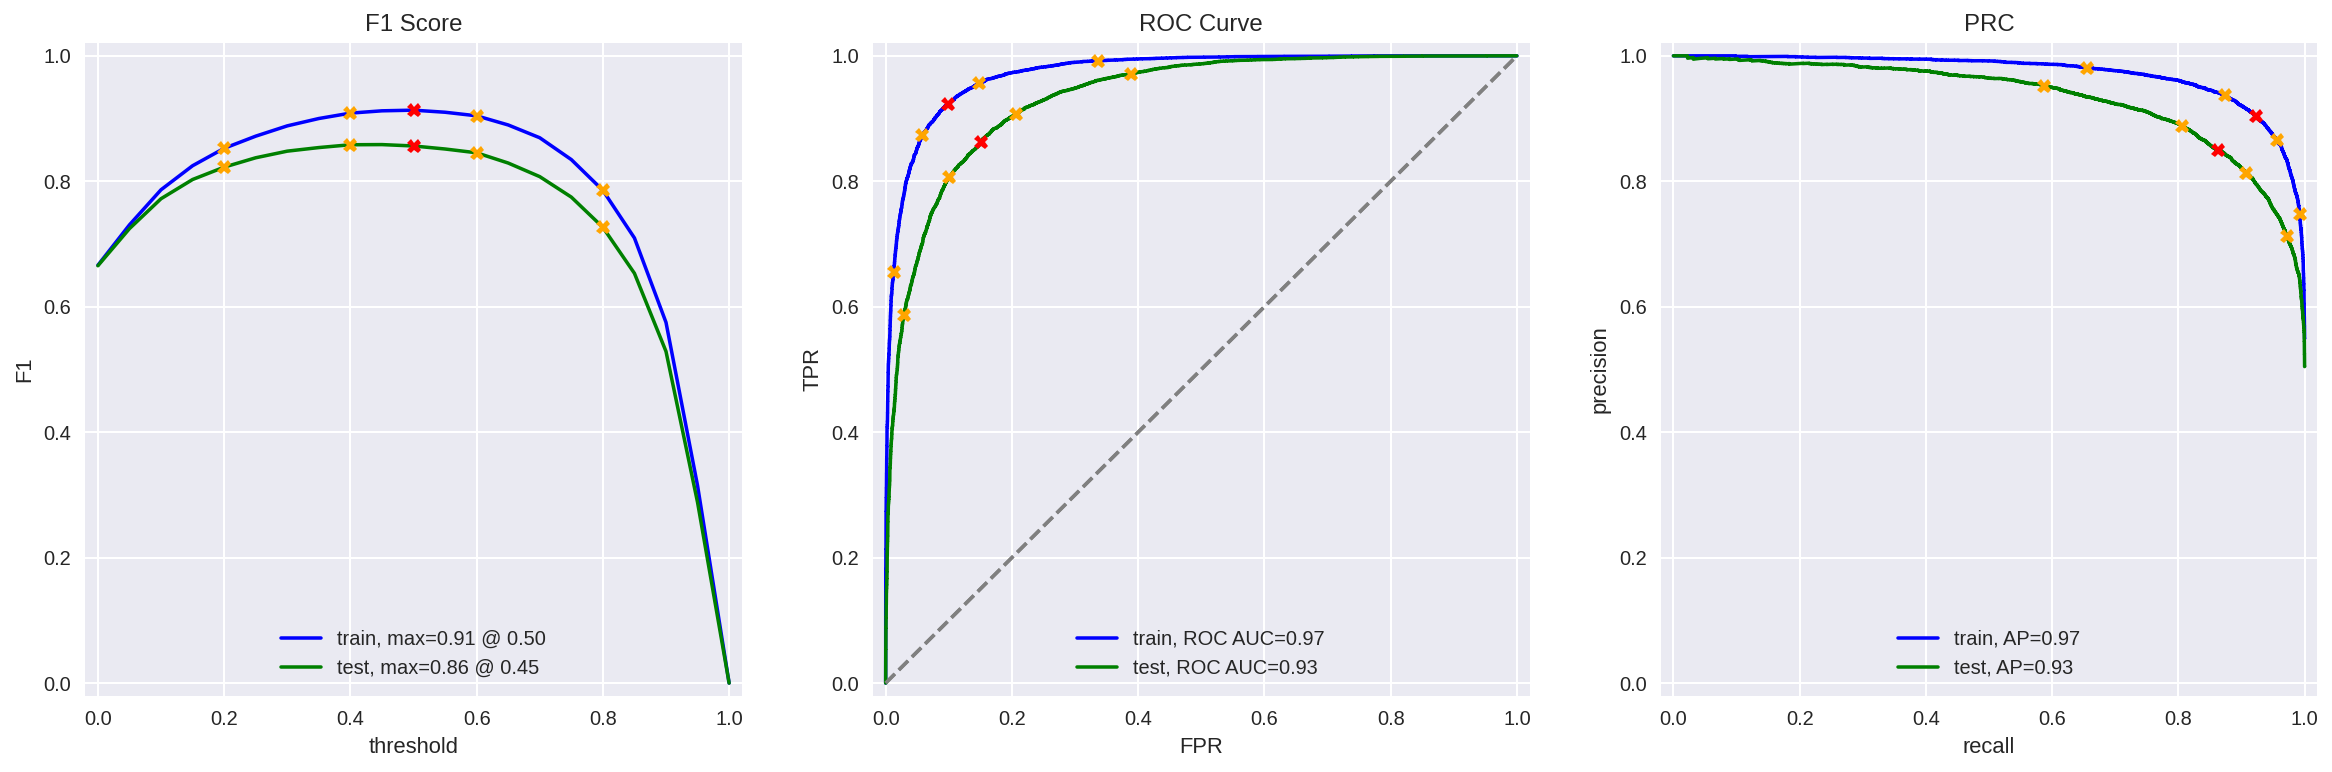

In [81]:
evaluate_model(model_4, train_tf_idf_model_3 , y_train, test_tf_idf_model_3, y_test)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, you trained a couple of different models using vectorized text data

</div>

###  Model 9 - BERT

In [18]:
import torch
import transformers

In [19]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    for text in texts:
        ids = tokenizer.encode(text, add_special_tokens=True, max_length = max_length, truncation=True)
        padded = np.array(ids + [0] * (max_length-len(ids)))
        attention_mask = np.where(padded !=0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
        
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size * i:batch_size * (i + 1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The code for generating BERT embeddings is correct

</div>

In [21]:
from transformers import BertTokenizer

# Preprocess and tokenize the 'review' column
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_and_tokenize(text):
    text = re.sub(r"[^a-zA-Z' ]", "", text).lower()
    tokens = tokenizer.tokenize(text)
    return " ".join(tokens)

df_reviews['review_tokens'] = df_reviews['review'].apply(preprocess_and_tokenize)

In [ ]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
train_features_9 = BERT_text_to_embeddings(df_reviews['review_tokens'])

Using the cpu device.


  0%|          | 0/474 [00:00<?, ?it/s]

/tmp/ipykernel_55/2086695267.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


In [ ]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

I will not be training with BERT model because my kernel keeps crashing when I tried to train. I have talked to techincal support and tutor and they advise to just skip it. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, no problem! If you really want to try it, you can try training the model on google colab or kaggle, where you can get a jupyter notebook with a GPU for free

</div>

In [41]:
index = (['Constant', 'NLTK, TF-IDF, LR', 'spaCY, TF-IDF, LR', 'spaCY, TF-IDF, LGBMClassifer'])

data_train = pd.DataFrame({
    'Accuracy': [0.5, .94, 0.93, 0.91],
    'F1': [0.5, 0.94, 0.93, 0.91],
    'APS': [0.5, 0.98, 0.98, 0.97],
    'ROC_AUC': [0.5, 0.98, 0.98, 0.97]
}, index=index)

data_train

,Accuracy,F1,APS,ROC_AUC
Constant,0.50,0.50,0.50,0.50
"NLTK, TF-IDF, LR",0.94,0.94,0.98,0.98
"spaCY, TF-IDF, LR",0.93,0.93,0.98,0.98
"spaCY, TF-IDF, LGBMClassifer",0.91,0.91,0.97,0.97


In [50]:
index = (['Constant', 'NLTK, TF-IDF, LR', 'spaCY, TF-IDF, LR', 'spaCY, TF-IDF, LGBMClassifer'])

data_test = pd.DataFrame({
    'Accuracy': [0.5, .88, 0.88, 0.86],
    'F1': [0.5, .88, 0.88, 0.86],
    'APS': [0.5, 0.95, 0.95, 0.93],
    'ROC_AUC': [0.5, 0.95, 0.95, 0.93]
}, index=index)

data_test

,Accuracy,F1,APS,ROC_AUC
Constant,0.50,0.50,0.50,0.50
"NLTK, TF-IDF, LR",0.88,0.88,0.95,0.95
"spaCY, TF-IDF, LR",0.88,0.88,0.95,0.95
"spaCY, TF-IDF, LGBMClassifer",0.86,0.86,0.93,0.93


## Reviews

In [85]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['pos'] = [0, 0, 1, 0, 1, 1, 0, 1]

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: re.sub(r"[^a-zA-Z' ]", "", x).lower())
my_reviews

,review,pos,review_norm
0,"I did not simply like it, not my kind of movie.",0,i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",0,well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,1,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,0,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,1,i didn't expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",1,the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,0,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,1,launching on netflix was a brave move i reall...


### Model 2

In [91]:
texts = my_reviews['review_norm'].apply(lemmatize_text)

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f} | Actual: {my_reviews.pos[i]} | Predicted: {0 if my_reviews_pred_prob[i] < .5 else 1} | Text: {review[:50]}')

0.16 | Actual: 0 | Predicted: 0 | Text: i did not simply like it not my kind of movie
0.15 | Actual: 0 | Predicted: 0 | Text: well i wa bored and felt asleep in the middle of t
0.47 | Actual: 1 | Predicted: 0 | Text: i wa really fascinated with the movie
0.13 | Actual: 0 | Predicted: 0 | Text: even the actor looked really old and disinterested
0.30 | Actual: 1 | Predicted: 0 | Text: i did n't expect the reboot to be so good writer r
0.51 | Actual: 1 | Predicted: 1 | Text: the movie had it upside and downside but i feel li
0.04 | Actual: 0 | Predicted: 0 | Text: what a rotten attempt at a comedy not a single jok
0.88 | Actual: 1 | Predicted: 1 | Text: launching on netflix wa a brave move i really appr


### Model 3

In [93]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f} | Actual: {my_reviews.pos[i]} | Predicted: {0 if my_reviews_pred_prob[i] < .5 else 1} | Text: {review[:50]}')

0.20 | Actual: 0 | Predicted: 0 | Text: i did not simply like it not my kind of movie
0.12 | Actual: 0 | Predicted: 0 | Text: well i was bored and felt asleep in the middle of 
0.50 | Actual: 1 | Predicted: 0 | Text: i was really fascinated with the movie
0.10 | Actual: 0 | Predicted: 0 | Text: even the actors looked really old and disintereste
0.27 | Actual: 1 | Predicted: 0 | Text: i didn't expect the reboot to be so good writers r
0.47 | Actual: 1 | Predicted: 0 | Text: the movie had its upsides and downsides but i feel
0.03 | Actual: 0 | Predicted: 0 | Text: what a rotten attempt at a comedy not a single jok
0.92 | Actual: 1 | Predicted: 1 | Text: launching on netflix was a brave move  i really ap


### Model 4

In [95]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = count_tf_idf_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f} | Actual: {my_reviews.pos[i]} | Predicted: {0 if my_reviews_pred_prob[i] < .5 else 1} | Text: {review[:50]}')

0.62 | Actual: 0 | Predicted: 1 | Text: i did not simply like it not my kind of movie
0.32 | Actual: 0 | Predicted: 0 | Text: well i was bored and felt asleep in the middle of 
0.60 | Actual: 1 | Predicted: 1 | Text: i was really fascinated with the movie
0.32 | Actual: 0 | Predicted: 0 | Text: even the actors looked really old and disintereste
0.67 | Actual: 1 | Predicted: 1 | Text: i didn't expect the reboot to be so good writers r
0.72 | Actual: 1 | Predicted: 1 | Text: the movie had its upsides and downsides but i feel
0.29 | Actual: 0 | Predicted: 0 | Text: what a rotten attempt at a comedy not a single jok
0.76 | Actual: 1 | Predicted: 1 | Text: launching on netflix was a brave move  i really ap


<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were applied to custom reviews correctly

</div>

## Conclusions

Model 0, DummyClassier produces a F1, Accuracy, ROC-AUC, and APS score of 0.50 which is the lowest score for all models. 

1. Based on the training dataset: 

Reviews that processed with NLTK method has the highest Accuray and F1 score of 0.94, while APS and ROC-AUC scores are the same when procssed reviews with spACY method. 

SpaCY method was performed on both Logistic Regression and LGBM Classifier models and the Logistic Regression model results in a higher score on Accracy, F1, ROC-AUC, and APS score. It is higher than LGBM Classifier model by 0.1-0.2 point. 

When running the NLTK and spaCY method, NLTK has a faster preprocessing time.

Unfortunately, BERT processing could not be train because, it would took too long and my kernel keeps crashing. After multiple attemps to fix it, I have decided to leave it out. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The training scores don't really matter. What we're really interested in is how well the models generalize to new data, which is estimated by the test set score

</div>

2. Based on the testing dataset: 
    
Similar observations with the training dataset. The only difference is NLTK and spaCY methods for Logistic Regression have the same scores for F1, Accuracy, ROC-AUC, and APS. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

In [ ]:
Based on the fake reviews: 

Model 2 predicts 6/8 reviews correctly. 

Model 3 predicts 5/8 reviews correctly.

Model 4 predicts 7/8 reviews correctly. With the reviews, LGBM Classifier model with spACY preprocessing produces the most accuracy which co 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Note that the last section was included only for illustration purposes. It wouldn't make sense to make any conclusions about the models' performance based on a test set with 8 data points :)

</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions